11


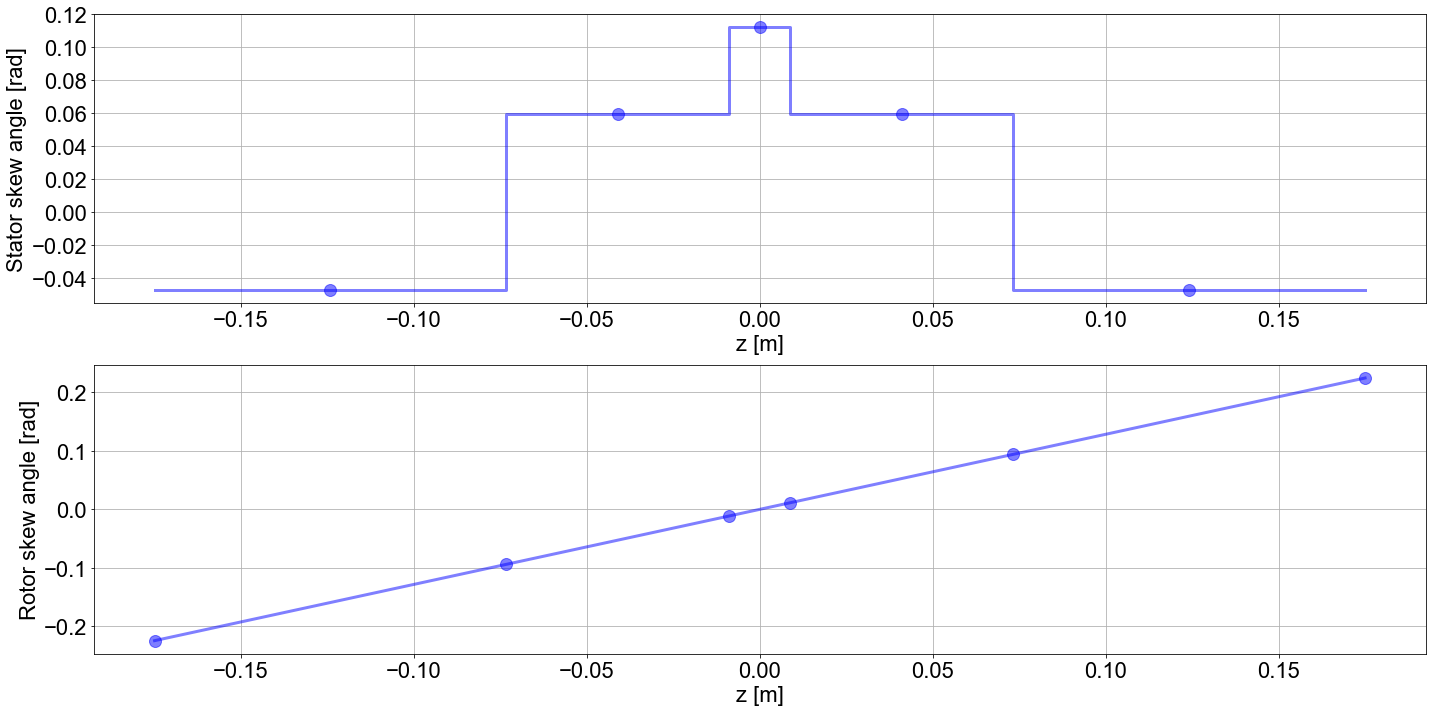

In [8]:
from os import chdir
chdir('..')
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
from pyleecan.Classes.Skew import Skew
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.Output import Output
from pyleecan.Classes.SkewModel import SkewModel
from pyleecan.Classes.Magnetics import Magnetics
SCIM_001 = load(join(DATA_DIR, "Machine", "SCIM_001.json"))
SCIM_001.stator.skew = Skew(type="vshape", rate=36/28, is_step=True)
SCIM_001.rotor.skew = Skew(type="linear", rate=2, is_step=False)
simu = Simu1(name="skew", machine=SCIM_001)
out = Output(simu=simu)
simu.mag = Magnetics()
simu.mag.skew_model = SkewModel(type_dist="gauss", Nslices=5)
simu.mag.skew_model.comp_skew()
simu.mag.skew_model.plot()
print(len(out.mag.skew_axis))